In [4]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import trange, tqdm

from load_graph import *

pal = sns.color_palette("colorblind")
colors = [pal[0], pal[1] ,pal[2]]
dpi = 800

In [5]:
def plot_overlap_densities(graphs, LARGE, titles):
    data = []
    for (g, coms), title in zip(graphs, titles):
        print(title)
        large_overlaps = set()
        for i in trange(len(coms)):
            for j in range(i):
                if len(coms[i].intersection(coms[j])) >= LARGE:
                    large_overlaps.add((i,j))

        for k, (i,j) in tqdm(enumerate(large_overlaps), total=len(large_overlaps)):
            if len(coms[i]) < len(coms[j]):
                small_com = coms[i]
                large_com = coms[j]
            else:
                small_com = coms[j]
                large_com = coms[i]
            intersection = small_com.intersection(large_com)
            for c, name in zip([intersection, small_com, large_com], ["Intersection", "Smaller Community", "Larger Community"]):
                sg = g.subgraph(c)
                density = 2*sg.ecount() / (sg.vcount()*(sg.vcount())-1)
                data.append([title, name, density])


    df = pd.DataFrame(data, columns=['Graph', 'Set', 'Density'])
    fig, ax = plt.subplots(dpi=400)
    sns.boxplot(x="Graph", y="Density",
            hue="Set", palette=colors,
            data=df,
            whis=(0, 100),
            ax=ax
            )
    sns.despine(offset=10, trim=True)
    #plt.ylim((0, 0.2))
    plt.title(f"{titles[0]}-Like Overlap Densities", fontsize=16)
    plt.xlabel("Graph", fontsize=15)
    plt.ylabel("Density", fontsize=15)
    ax.tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()

DBLP


100%|██████████| 54905/54905 [01:35<00:00, 576.62it/s]


D=2


100%|██████████| 22814/22814 [00:24<00:00, 935.40it/s] 


D=8


100%|██████████| 17613/17613 [00:47<00:00, 370.46it/s]


D=64


100%|██████████| 84387/84387 [03:41<00:00, 380.61it/s]


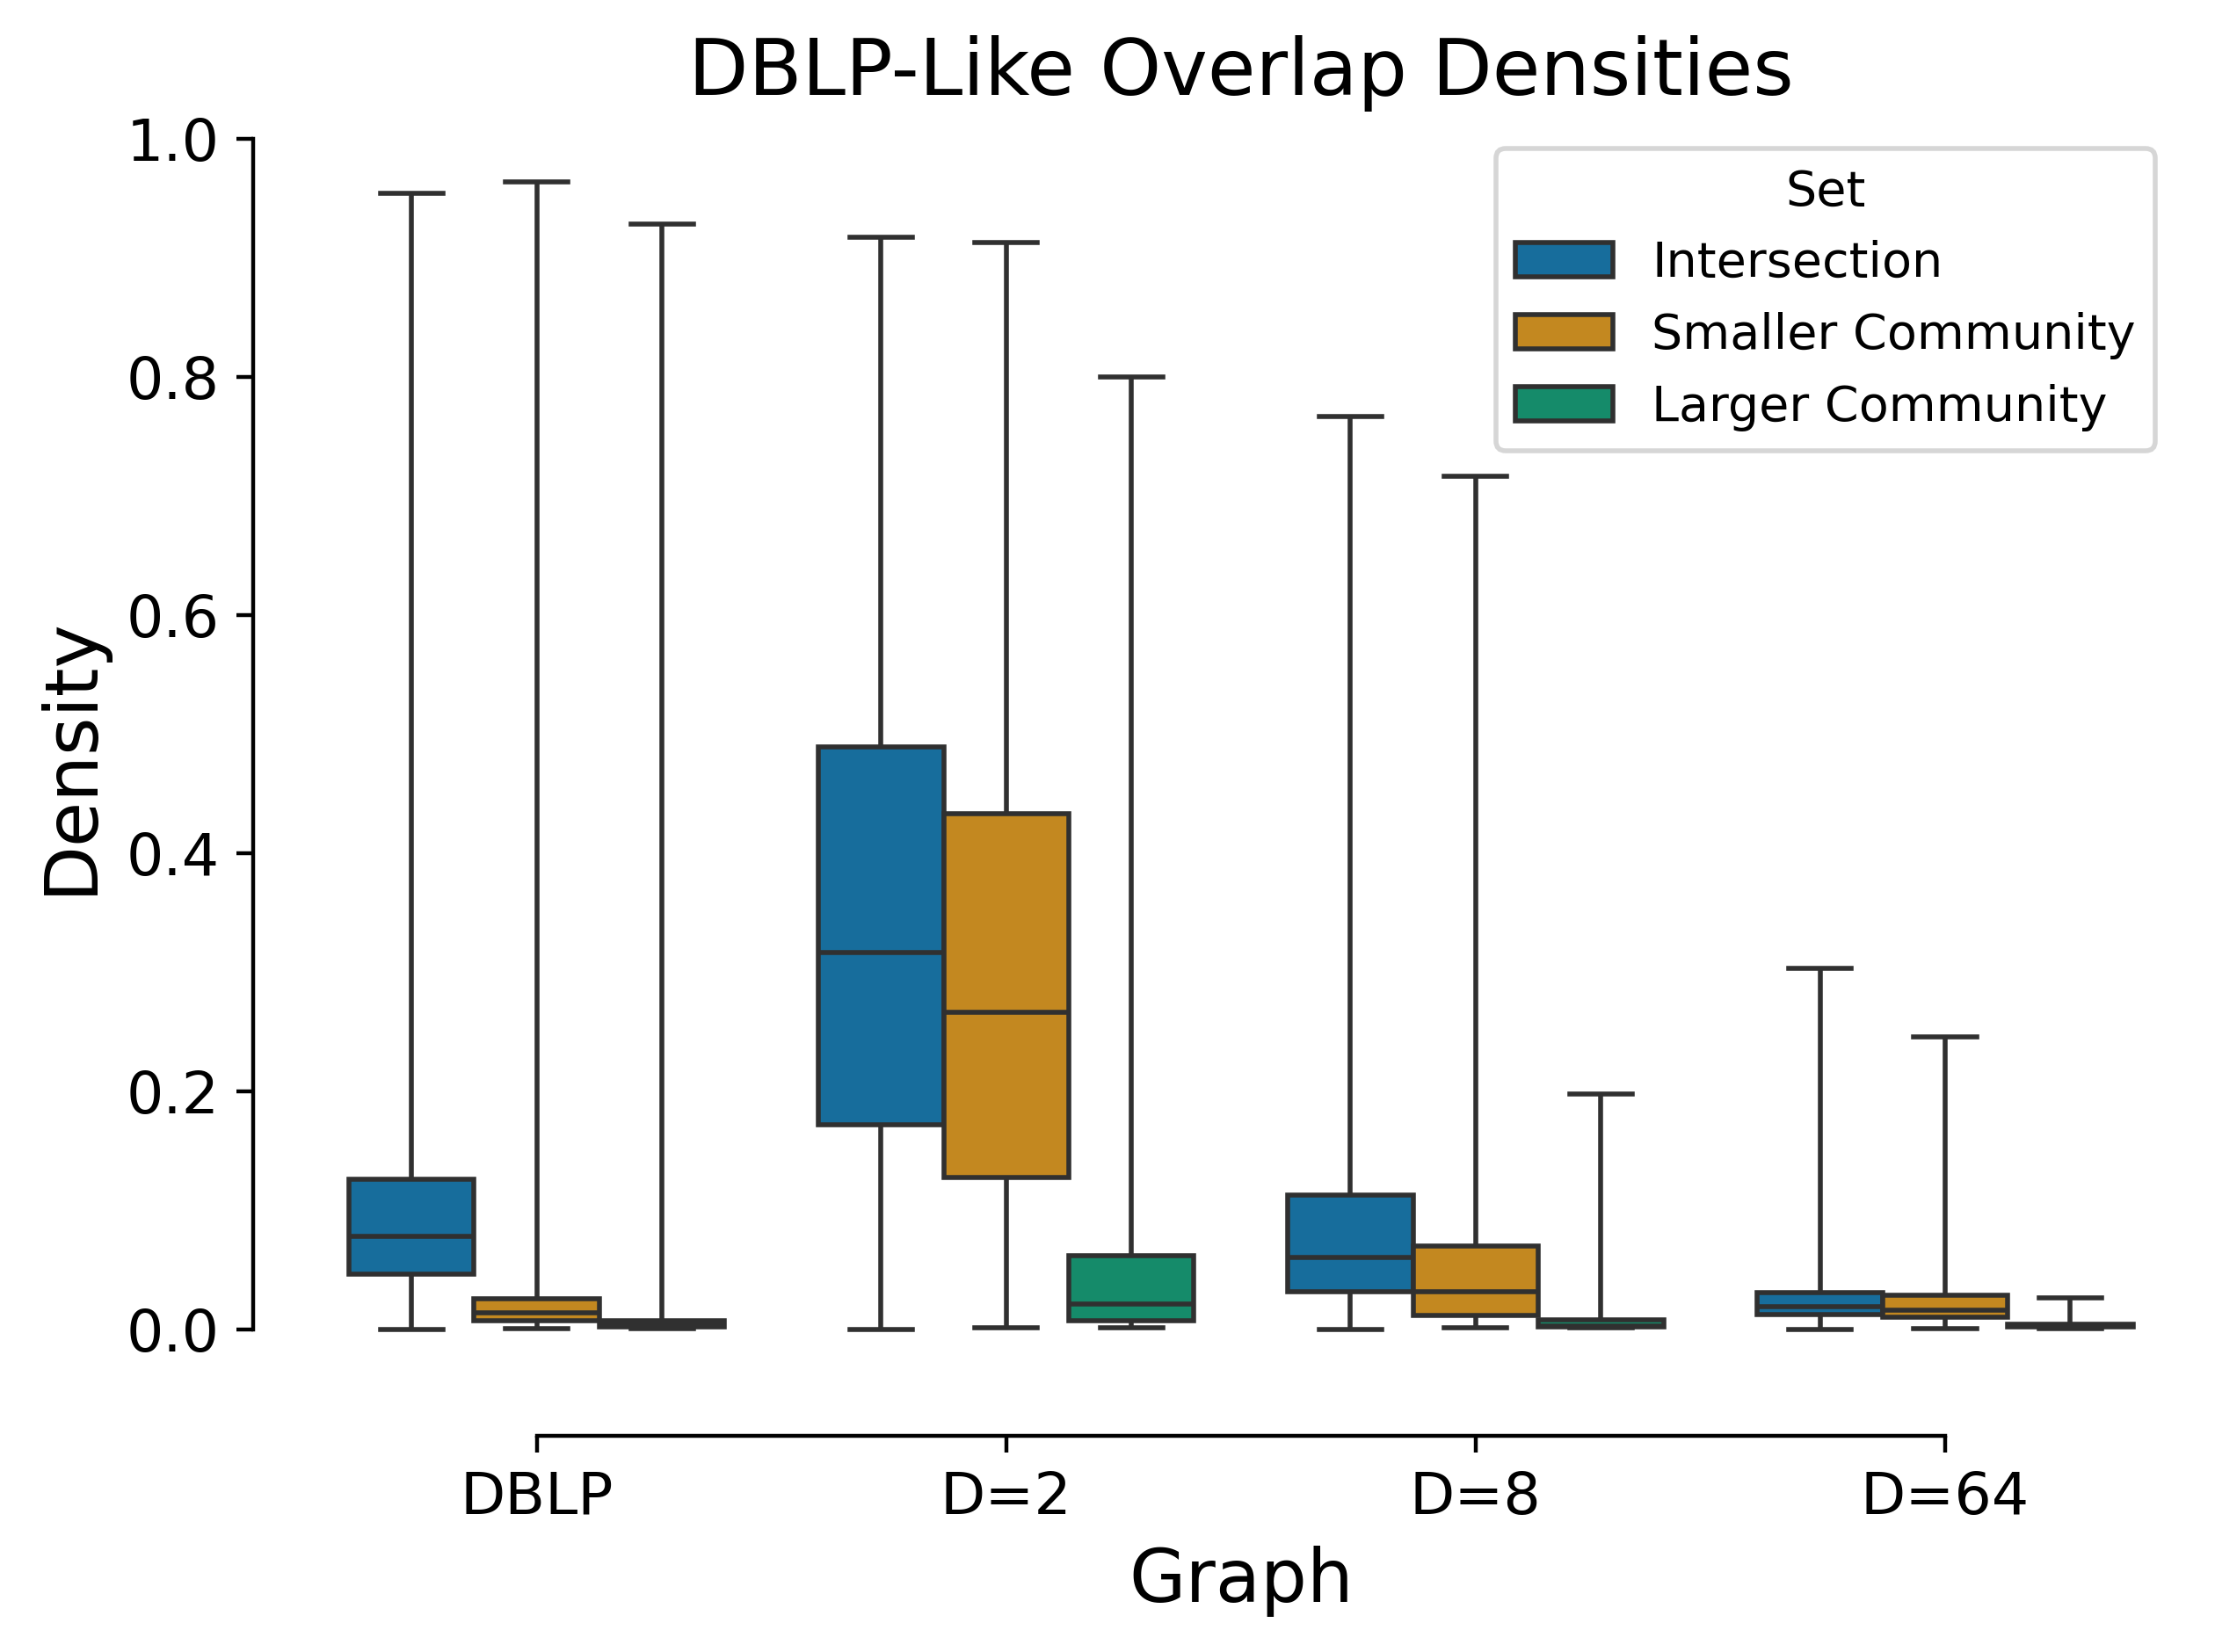

In [6]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
abcdoo_d2 = load_abcdoo("data/abcdoo_dblp_d2_edge.dat", "data/abcdoo_dblp_d2_com.dat")
abcdoo_d8 = load_abcdoo("data/abcdoo_dblp_d8_edge.dat",  "data/abcdoo_dblp_d8_com.dat")
abcdoo_d64 = load_abcdoo("data/abcdoo_dblp_d64_edge.dat", "data/abcdoo_dblp_d64_com.dat")

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d8,
        abcdoo_d64,
        ],
    10,
    [
        "DBLP",
        "D=2",
        "D=8",
        "D=64",
        ]
)

Youtube


100%|██████████| 5879/5879 [00:01<00:00, 3685.33it/s]


D=2


100%|██████████| 4313/4313 [00:01<00:00, 2625.66it/s]


D=8


100%|██████████| 2586/2586 [00:02<00:00, 1107.55it/s]


D=64


100%|██████████| 6888/6888 [00:07<00:00, 927.22it/s] 


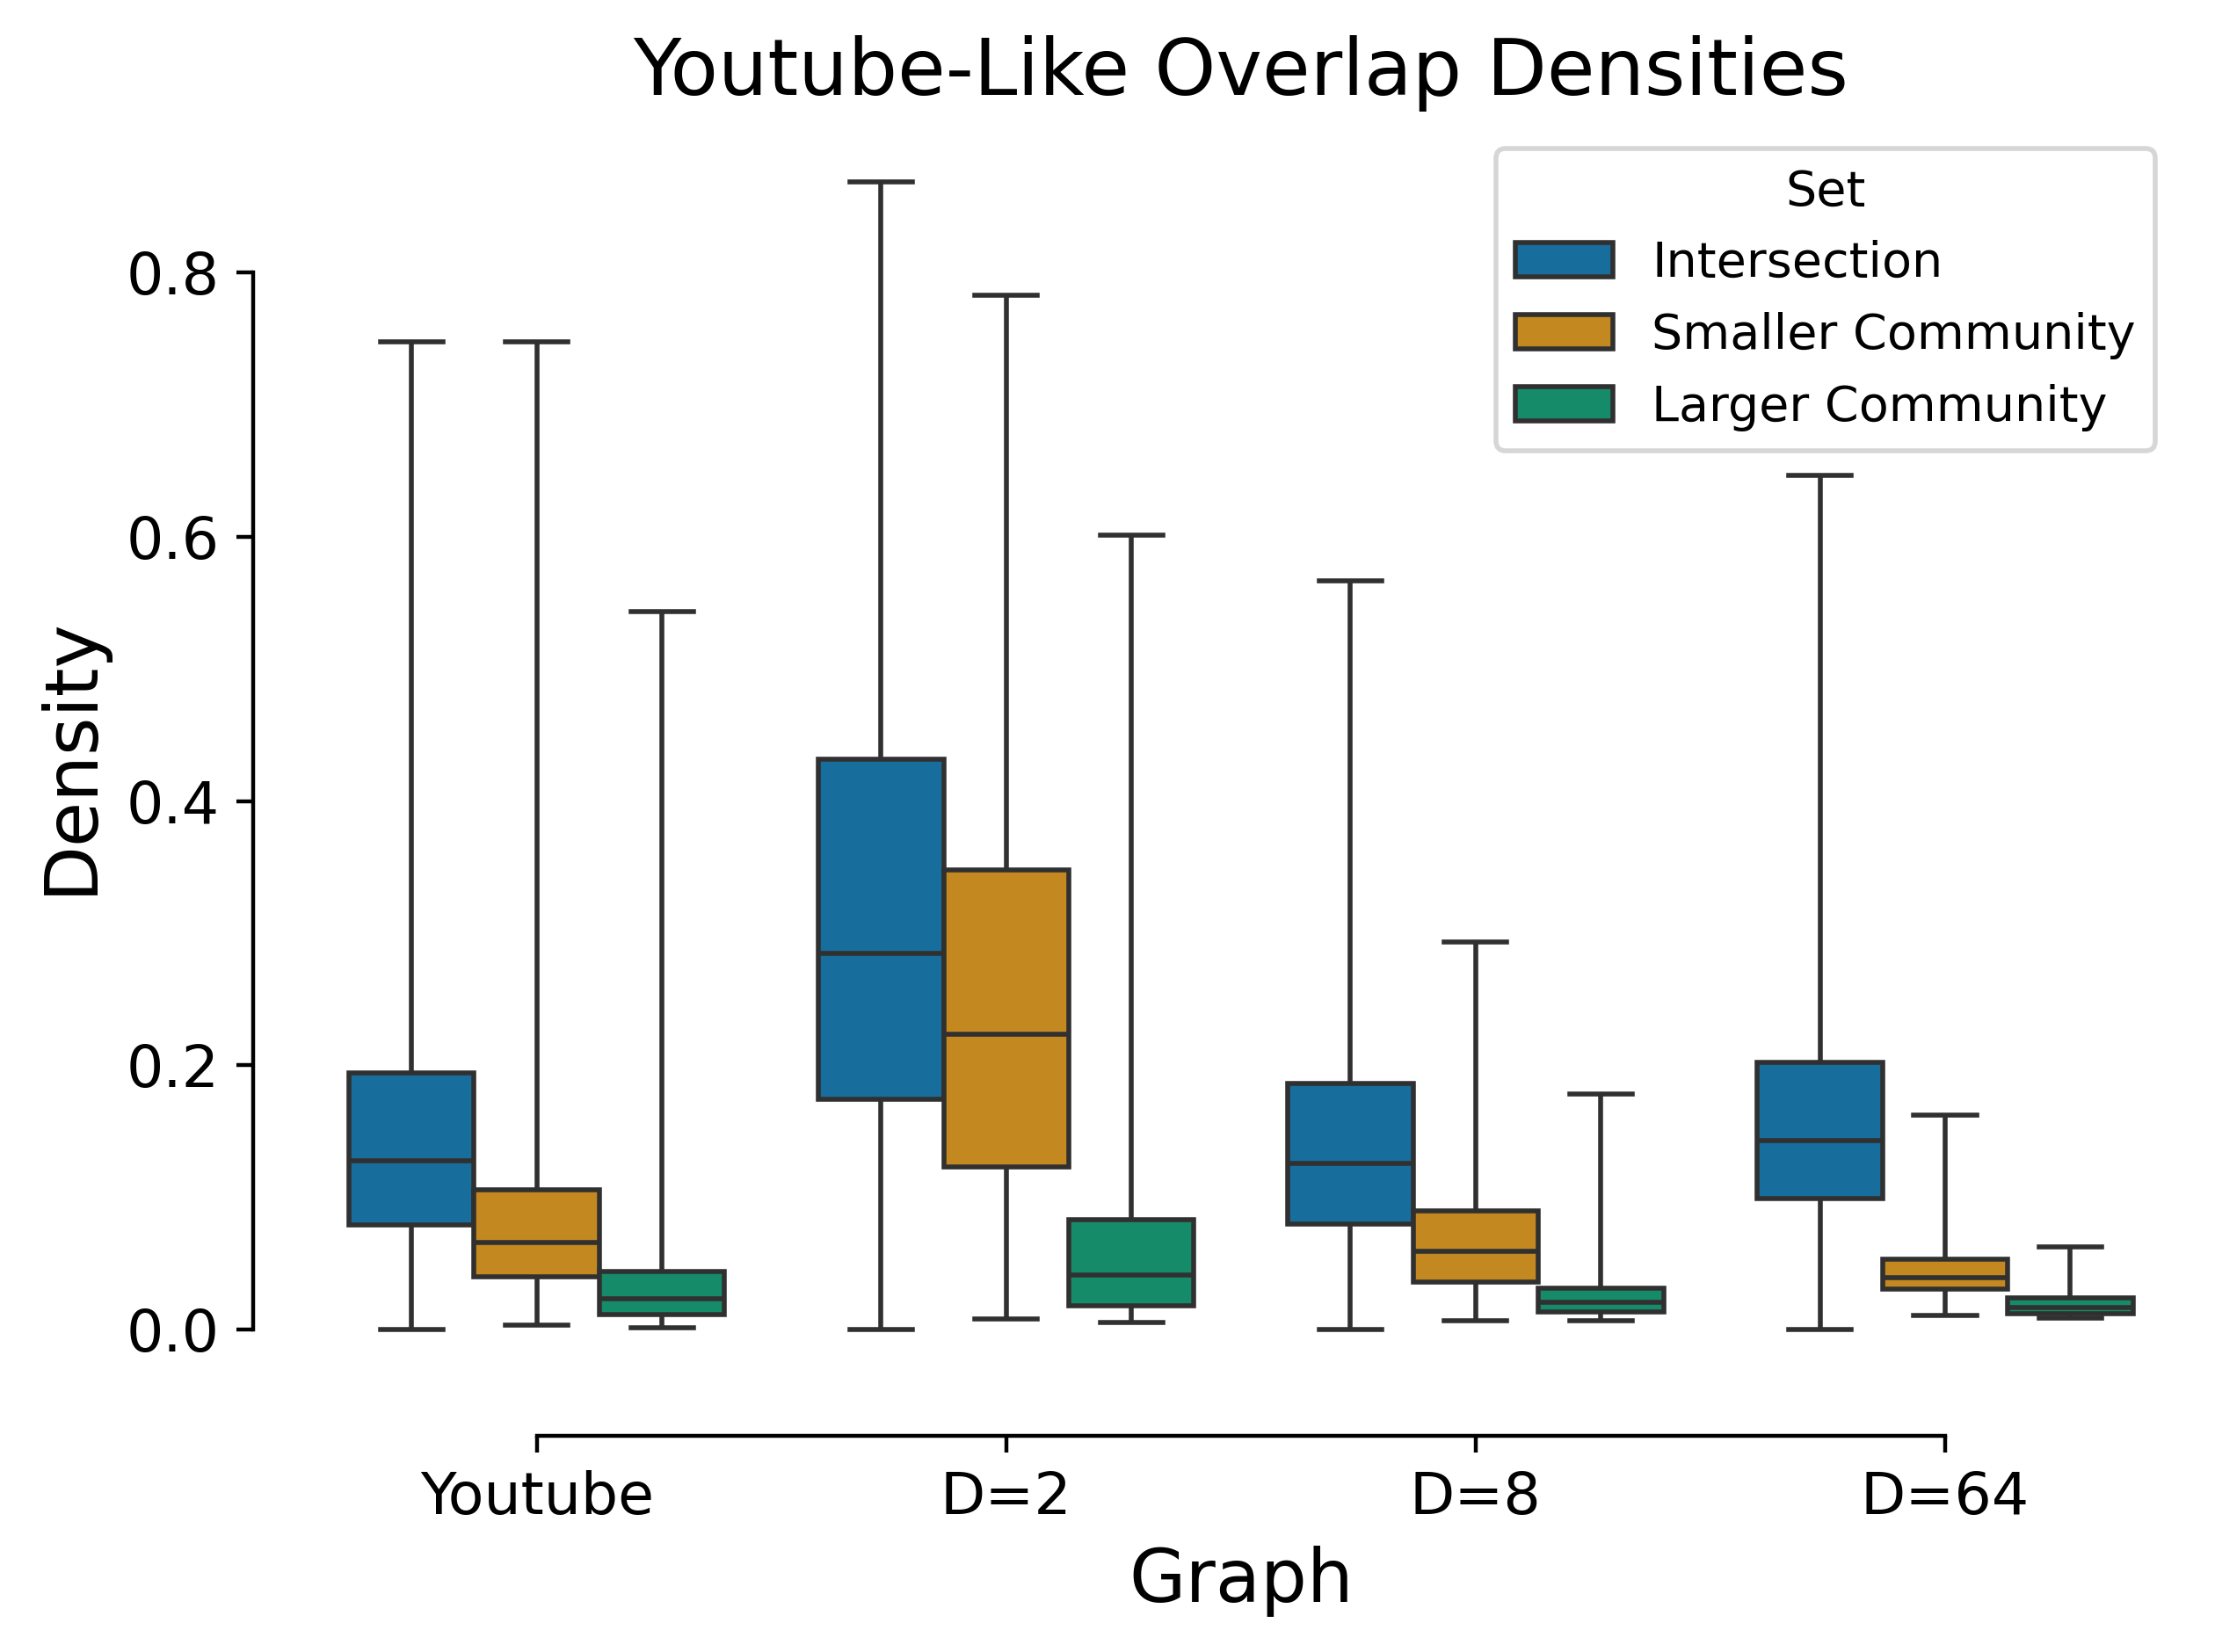

In [7]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
abcdoo_d2 = load_abcdoo("data/abcdoo_youtube_d2_edge.dat", "data/abcdoo_youtube_d2_com.dat", has_outliers=False)
abcdoo_d8 = load_abcdoo("data/abcdoo_youtube_d8_edge.dat",  "data/abcdoo_youtube_d8_com.dat", has_outliers=False)
abcdoo_d64 = load_abcdoo("data/abcdoo_youtube_d64_edge.dat", "data/abcdoo_youtube_d64_com.dat", has_outliers=False)

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d8,
        abcdoo_d64,
        ],
    10,
    [
        "Youtube",
        "D=2",
        "D=8",
        "D=64",
        ]
)

Amazon


100%|██████████| 134935/134935 [08:42<00:00, 258.21it/s]


D=2


100%|██████████| 213538/213538 [10:05<00:00, 352.48it/s] 


D=8


100%|██████████| 162027/162027 [10:23<00:00, 259.79it/s]


D=64


100%|██████████| 394740/394740 [34:44<00:00, 189.40it/s]  


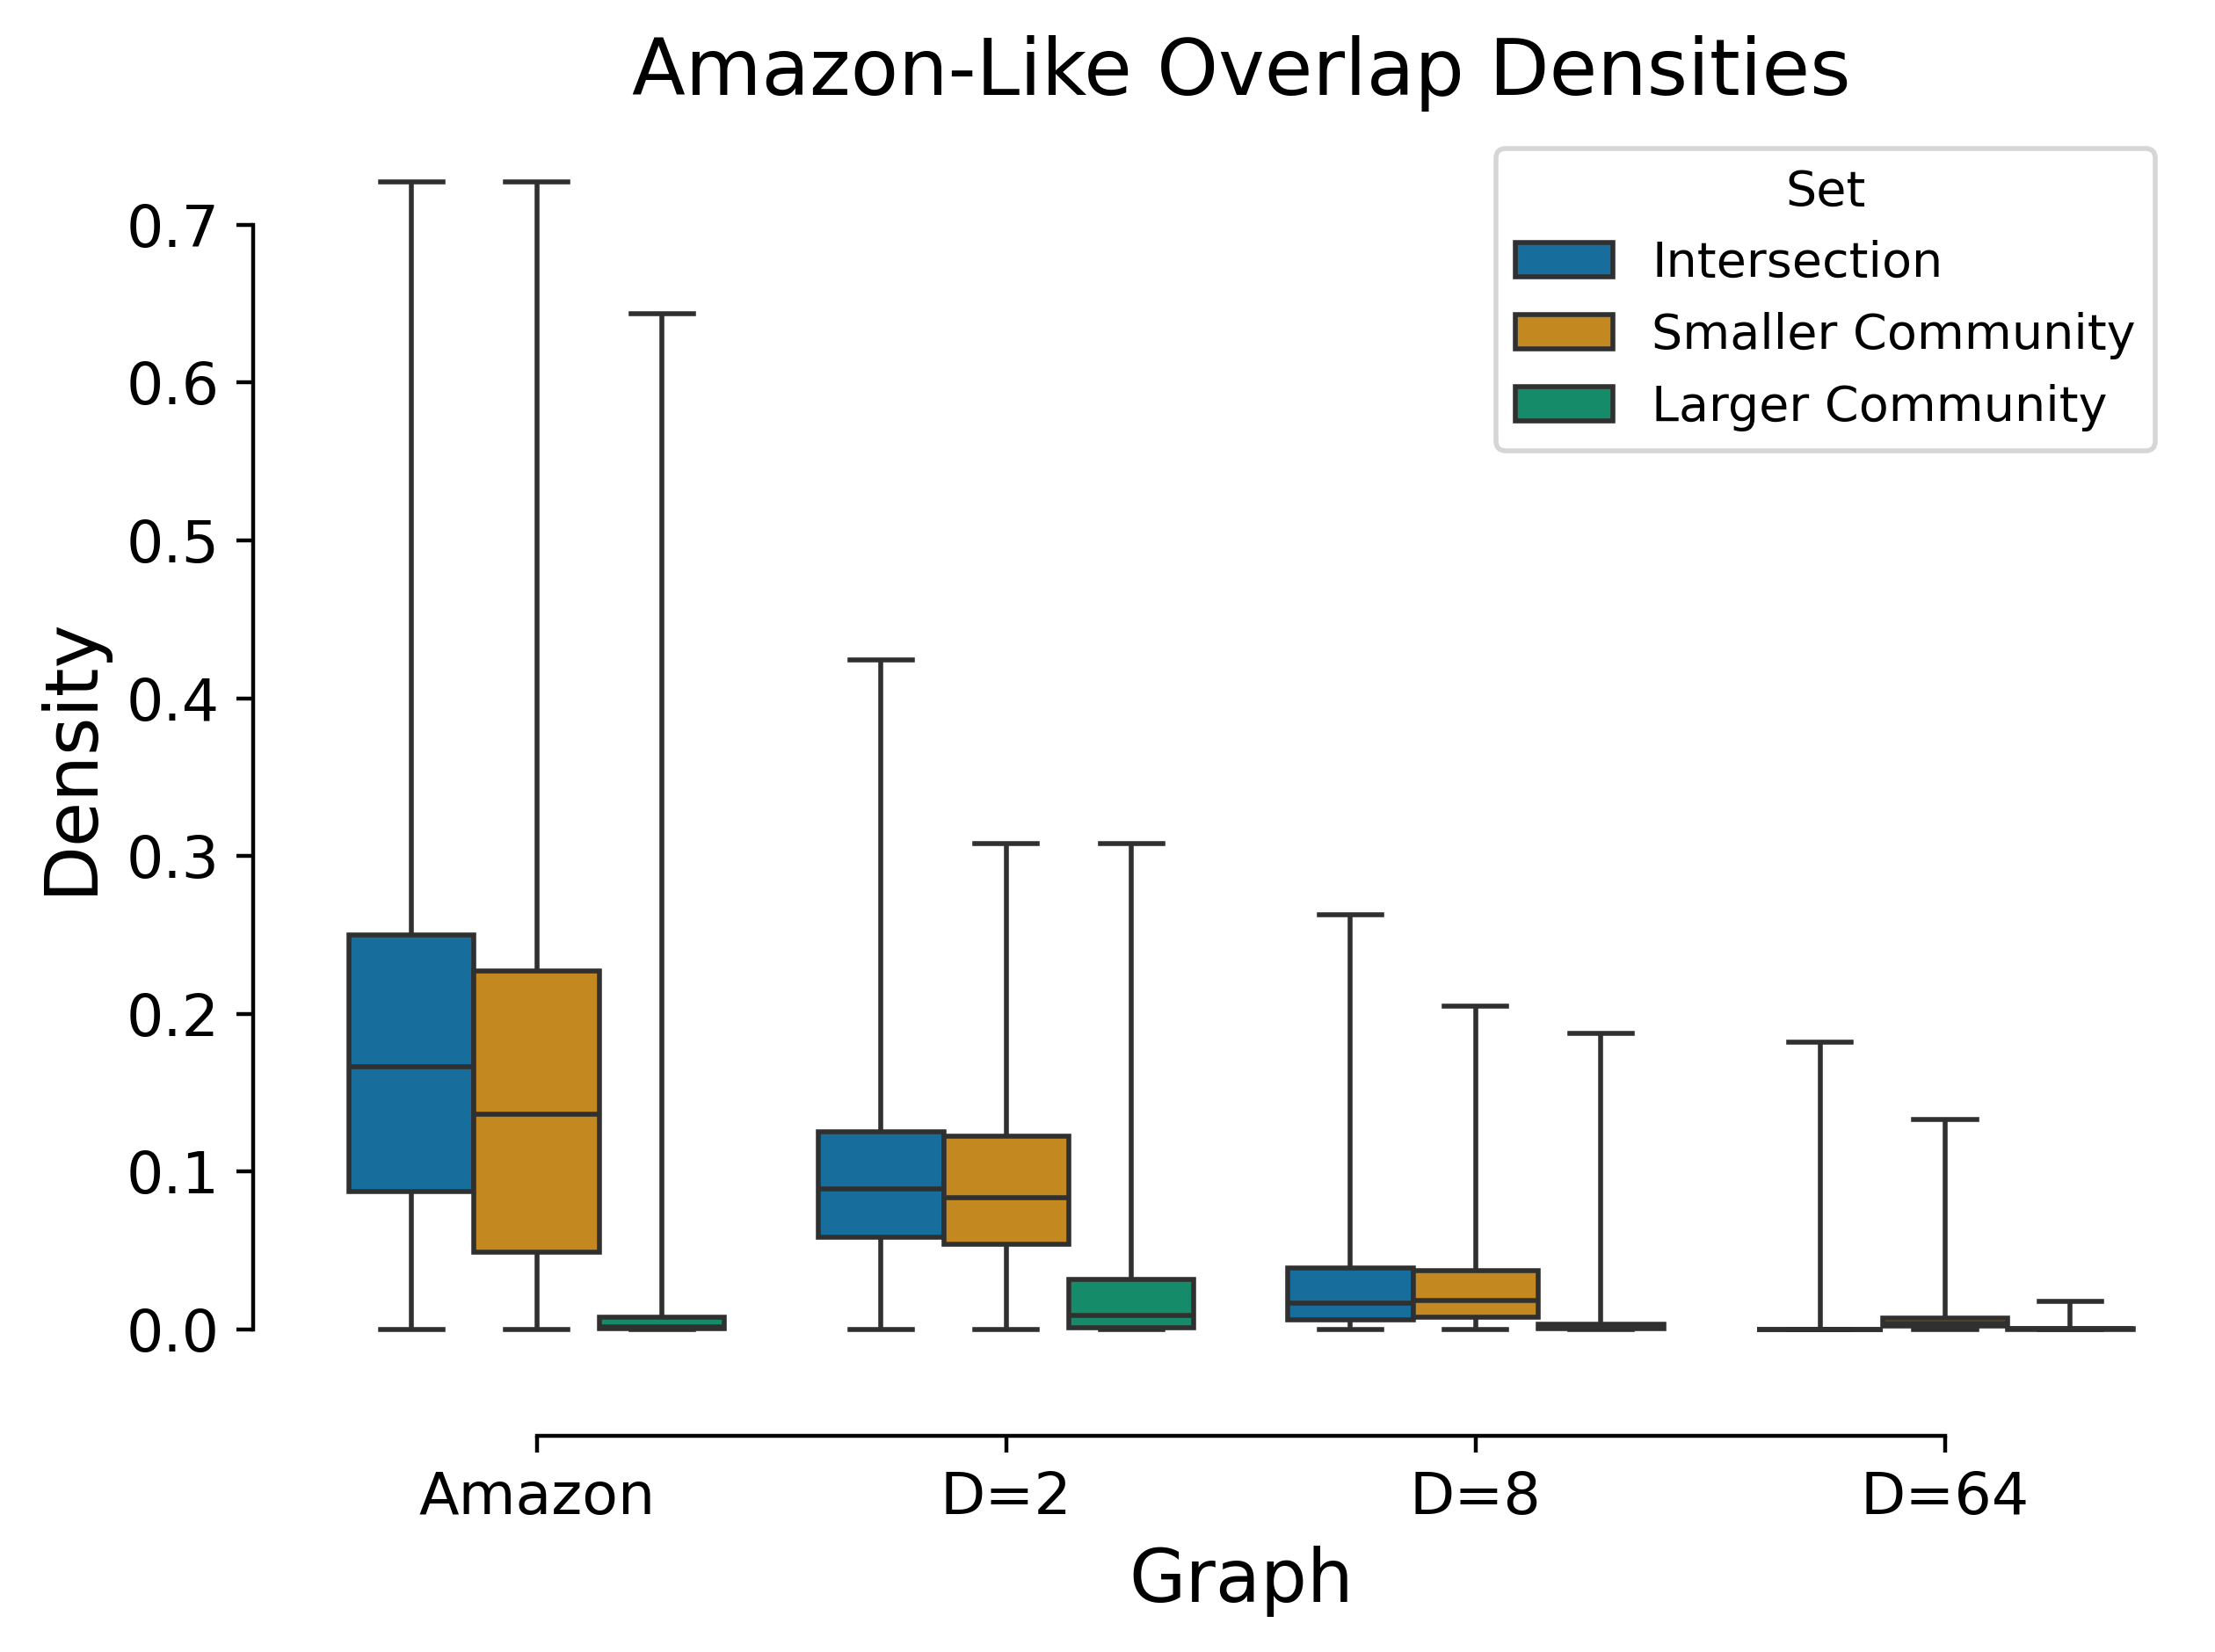

In [8]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
abcdoo_d2 = load_abcdoo("data/abcdoo_amazon_d2_edge.dat", "data/abcdoo_amazon_d2_com.dat")
abcdoo_d8 = load_abcdoo("data/abcdoo_amazon_d8_edge.dat",  "data/abcdoo_amazon_d8_com.dat")
abcdoo_d64 = load_abcdoo("data/abcdoo_amazon_d64_edge.dat", "data/abcdoo_amazon_d64_com.dat")

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d8,
        abcdoo_d64,
        ],
    10,
    [
        "Amazon",
        "D=2",
        "D=8",
        "D=64",
        ]
)